In [1]:
import pandas as pd
import tensorflow
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential

In [3]:
import time
import h5py
import matplotlib.pyplot as plt
import os
import sys
import scipy
import random

In [4]:
print(tensorflow.__version__)
print(tf.test.is_gpu_available())
print(tf.__version__)
print(keras.__version__)
print("Num GPUs Available: ", tf.config.experimental.list_physical_devices())

2.8.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
2.8.0
2.8.0
Num GPUs Available:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
print(os.getcwd())

E:\JHU\2022Fall\ml\project


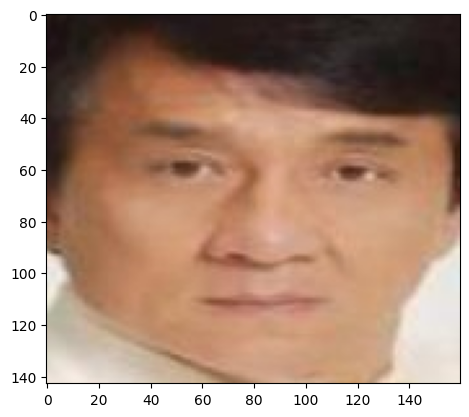

In [6]:
from numpy.ma.core import expand_dims
image = load_img("AFDB_face_dataset/chenglong/0_0_chenglong_0004.jpg")
plt.imshow(image)
plt.show()
image = img_to_array(image)
image = expand_dims(image, 0)

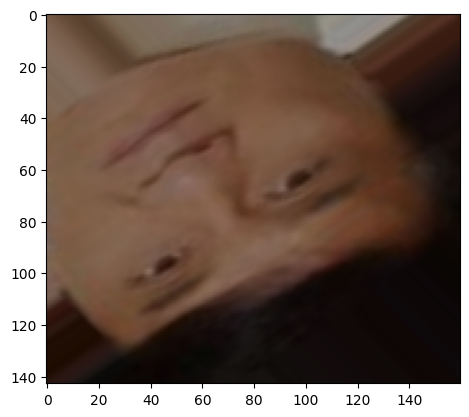

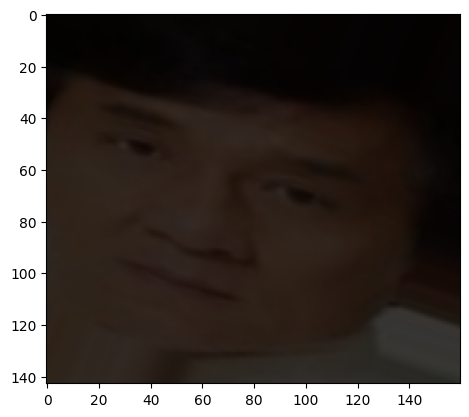

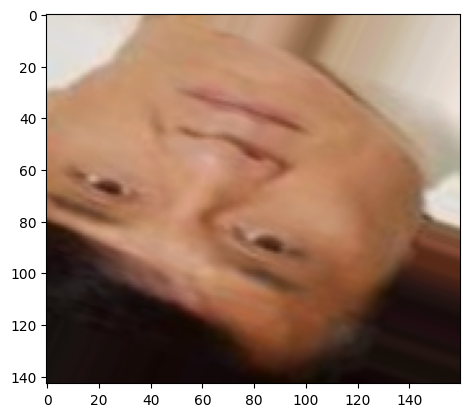

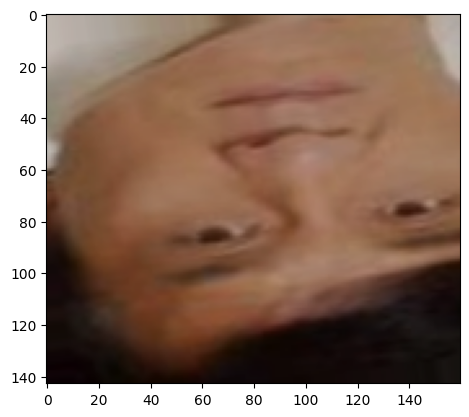

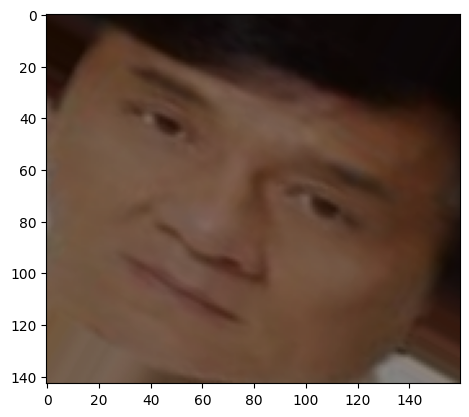

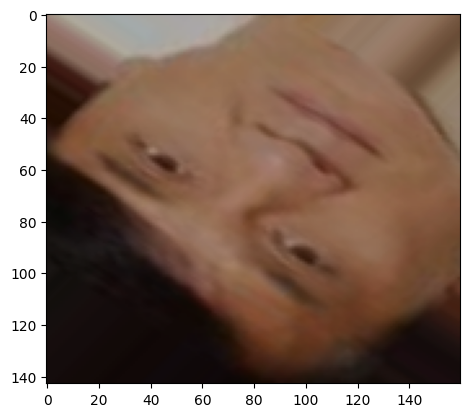

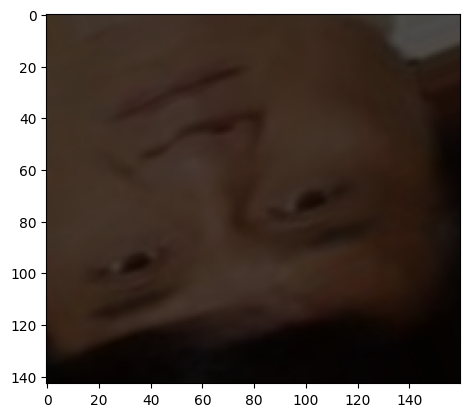

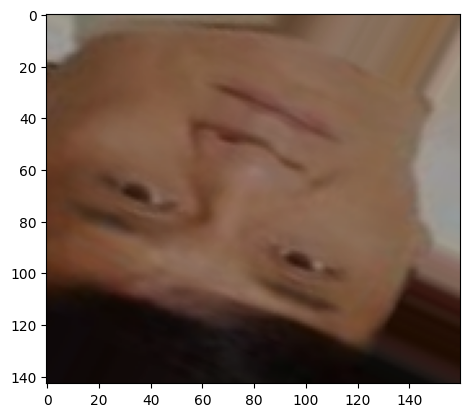

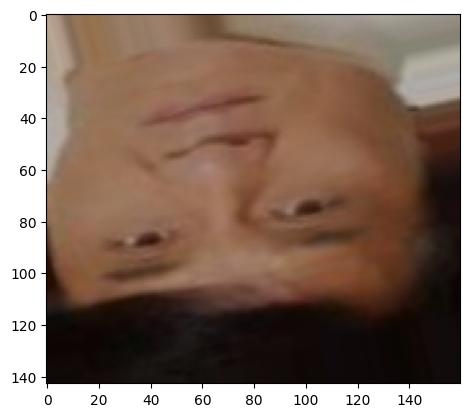

In [7]:
generator = ImageDataGenerator(rotation_range=40, zoom_range = 0.2, horizontal_flip = True, vertical_flip = True, fill_mode = "nearest", shear_range=0.2, width_shift_range = 0.1, brightness_range = [0.2, 1.0])

iterator = generator.flow(image,batch_size = 1)

for i in range(9):
    batch = iterator.next()
    new_image = batch[0].astype("uint8")
    plt.imshow(new_image)
    plt.show()


In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "AFDB_face_dataset/",
    validation_split=0.3,
    subset="training",
    seed=123,
    image_size=(224, 224),
    label_mode = "categorical",
    batch_size=200)

Found 5657 files belonging to 30 classes.
Using 3960 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    "AFDB_face_dataset/",
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    label_mode = "categorical",
    batch_size=200)

Found 5657 files belonging to 30 classes.
Using 1697 files for validation.


In [10]:
class_names = train_ds.class_names
print("people names are :", class_names)
print("Number of people: ", len(class_names))

people names are : ['chenglong', 'qiqi', 'qiushuzhen', 'qiuze', 'qiwei', 'raowei', 'rongzuer', 'ruanjingtian', 'shenteng', 'shuqi', 'songdandan', 'songqian', 'songxiaobo', 'songxiaofeng', 'sunli', 'sunxiaoxiao', 'sunyi', 'sunyizhou', 'suxing', 'tangwei', 'wangdongcheng', 'wangfei', 'wangfeng', 'wanghan', 'wangjie', 'yaochen', 'zhangbichen', 'zhangbinbin', 'zhangbo', 'zhangdanfeng']
Number of people:  30


In [11]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# ## Loading VGG16 model
pretrained_mode_vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
pretrained_mode_vgg16.trainable = False ## Not trainable weights

In [12]:
pretrained_model_mobilenetv2 = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model_mobilenetv2.trainable = False
pretrained_model_mobilenetv2.layers.pop()
pretrained_model_mobilenetv2.layers.pop()
pretrained_model_mobilenetv2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [13]:
from pandas.core.groupby import base
model= Sequential([
    layers.Rescaling(1./255, input_shape=(224,224,3)),
    pretrained_mode_vgg16,
    # layers.Rescaling(1./255, input_shape=(180, 180, 3)), # normalization (n, m, 3)
    # layers.Conv2D(filters=32,kernel_size = (3,3),  activation='relu'),
    # layers.MaxPool2D(2,2),
    # layers.Conv2D(filters=32,kernel_size = (3,3),  activation='relu'),
    # layers.MaxPool2D(2,2),
    # layers.Conv2D(filters=32,kernel_size = (3,3),  activation='relu'),
    # layers.MaxPool2D(2,2),
    # layers.Conv2D(filters=32,kernel_size = (3,3),  activation='relu'),
    # layers.MaxPooling2D(),
    layers.Flatten(),

    layers.Dense(512,activation='relu'),
    layers.Dense(512,activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names),activation = 'softmax')


])

model.compile(
    loss='categorical_crossentropy',
    metrics=['acc'],
    optimizer='adam'
)

In [14]:
model.build()

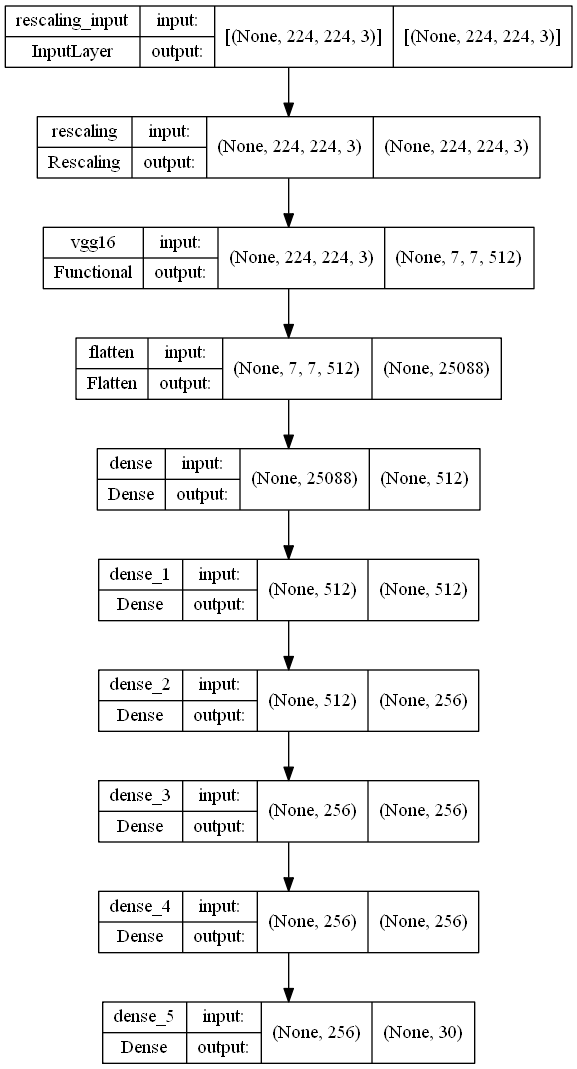

In [15]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [16]:
history = model.fit(train_ds, epochs = 30, validation_data = val_ds)


Epoch 1/30
20/20 [==============================] - 77s 3s/step - loss: 3.3636 - acc: 0.0715 - val_loss: 3.0817 - val_acc: 0.1432
Epoch 2/30
20/20 [==============================] - 29s 1s/step - loss: 2.8426 - acc: 0.1848 - val_loss: 2.5761 - val_acc: 0.2334
Epoch 3/30
20/20 [==============================] - 28s 1s/step - loss: 2.3074 - acc: 0.3207 - val_loss: 2.0788 - val_acc: 0.3889
Epoch 4/30
20/20 [==============================] - 28s 1s/step - loss: 1.7459 - acc: 0.4735 - val_loss: 1.8228 - val_acc: 0.4478
Epoch 5/30
20/20 [==============================] - 31s 2s/step - loss: 1.2721 - acc: 0.6152 - val_loss: 1.7184 - val_acc: 0.5038
Epoch 6/30
20/20 [==============================] - 30s 2s/step - loss: 0.9567 - acc: 0.7088 - val_loss: 1.7770 - val_acc: 0.5239
Epoch 7/30
20/20 [==============================] - 32s 2s/step - loss: 0.7247 - acc: 0.7896 - val_loss: 1.7355 - val_acc: 0.5463
Epoch 8/30
20/20 [==============================] - 30s 2s/step - loss: 0.4416 - acc: 0.87

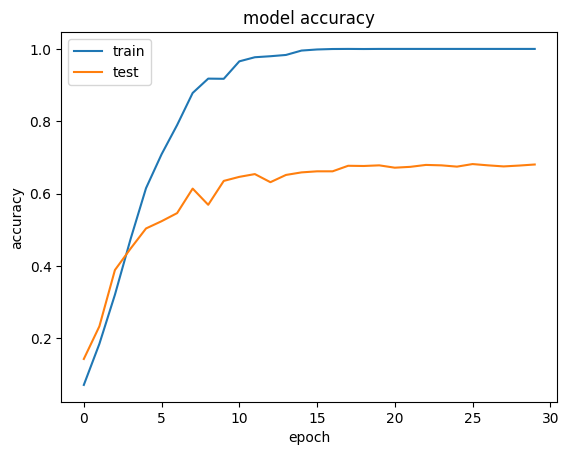

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

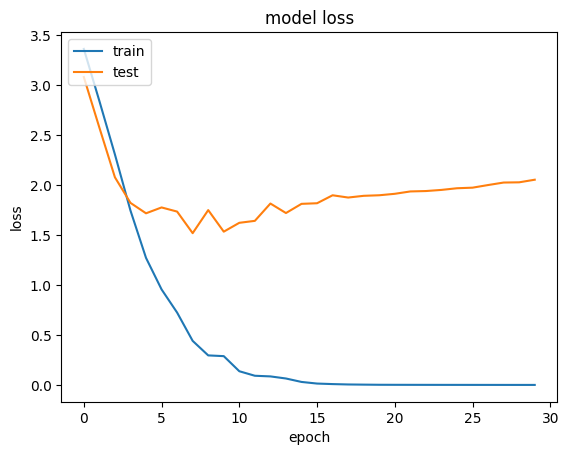

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# Evaluating model on validation data
# loss and accuracy
evaluate_train = model.evaluate(train_ds)
print(evaluate_train)
evaluate_val = model.evaluate(val_ds)
print(evaluate_val)

20/20 [==============================] - 26s 1s/step - loss: 6.0136e-04 - acc: 1.0000
[0.0006013608654029667, 1.0]
9/9 [==============================] - 11s 1s/step - loss: 2.0546 - acc: 0.6806
[2.054598093032837, 0.6806128621101379]
